The food delivery time prediction model is essential in the the food delivery industry, where timely and accurate deliveries are critical for customer satisfaction and overall experience.

To create an effective prediction model, data needs to cleaned meticulously in order to eliminate the errors and inconsistencies, enduring reliability and accuracy of the predictions.

Nest, feature engineering is used to derive valuable insights from the dataset. By considering factors such as delivery person's age, ratings, location coordinates, and time-related variable, we aimed to identify the key elements that affect the delivery time. These engineered features enhance the model's predictive power.

We the built the predictive model using regression algorithms like linear regression, decision tree, random forest and XGBoost. The model was trained on a subset of the dataset using cross validation techniques to ensure robustness. WE evaluated te model's accuracy with metrics such as mean squared error (MSE) and R-squared (R2) score.

The food delivery time prediction model enables business to optimize their operations and enhance the overall delivery experience for their customers.


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statistics
from geopy.distance import geodesic
from parsel.xpathfuncs import regex

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')


# Load & Interpret the Data


In [2]:
df_train = pd.read_csv('train.csv')
df_train.head(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,(min) 26
6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,19:30:00,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 40
7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,17:30:00,conditions Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,(min) 32
8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,21:05:00,conditions Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 34
9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,22:10:00,conditions Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,(min) 46


In [3]:
print("Shape of the dataframe : ", df_train.shape)

Shape of the dataframe :  (45593, 20)


In [4]:
print("Columns of the dataframe : \n", df_train.columns)

Columns of the dataframe : 
 Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [5]:
# Datatypes of each columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [6]:
# Statistical Analysis of all numerical columns
df_train.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


1. There is no missing values in the numerical columns
2. Mean and Median are close to each other. So, there is no outliers and the graphs should not be skewed

In [7]:
# Analysis of Categorical columns
df_train.describe(exclude=np.number)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
count,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593,45593
unique,45593,1320,23,29,44,177,193,7,5,4,4,5,3,4,45
top,0x4607,PUNERES01DEL01,35,4.8,15-03-2022,NaN,21:30:00,conditions Fog,Low,Snack,motorcycle,1,No,Metropolitian,(min) 26
freq,1,67,2262,7148,1192,1731,496,7654,15477,11533,26435,28159,44469,34093,2123


1. There are null values in ```Time_Ordered``` column
2. Data Formatting is required for columns ```Weatherconditions``` and ```Time_taken(min)```
3. Both numerical and categorical values are present in the dataframe
4. The ```ID``` and ```Delivery_person_ID``` will not be used to build the model

In [8]:
# Explore each column

for col in df_train.columns:
    print("Column : ", col)
    print("Different entries \n (Values Sorted): \n", df_train[col].value_counts().sort_values(ascending=False), " \n (Index Sorted) \n", df_train[col].value_counts().sort_index())
    print("----------------------------------------------------")

Column :  ID
Different entries 
 (Values Sorted): 
 ID
0x4607     1
0x36b8     1
0xb816     1
0x6c6b     1
0xd987     1
          ..
0x1178     1
0x7c09     1
0xd641     1
0x4f8d     1
0x5fb2     1
Name: count, Length: 45593, dtype: int64  
 (Index Sorted) 
 ID
0x1000     1
0x1001     1
0x1002     1
0x1003     1
0x1004     1
          ..
0xffa      1
0xffb      1
0xffc      1
0xffd      1
0xffe      1
Name: count, Length: 45593, dtype: int64
----------------------------------------------------
Column :  Delivery_person_ID
Different entries 
 (Values Sorted): 
 Delivery_person_ID
PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: count, Length: 1320, dtype: int64  
 (Index Sorted) 
 Delivery_person_ID
AGRRES010DEL01     14
AGRRES010DEL02     15
AGRRES010DEL03     13
AGRRES01DEL01      12
AGRRE

# Data Cleaning

In [9]:
# Update column names

def update_column_name(df, col_names_map):
    df.rename(columns=col_names_map, inplace=True)

col_names_map = {
    "Weatherconditions":"Weather_Conditions"
}
update_column_name(df=df_train, col_names_map=col_names_map)
print("Updated Column Names : ", df_train.columns)

Updated Column Names :  Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_Conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [10]:
# Update column names to title case

def update_col_names_title_case(df):
    for col in df.columns:
        old_col = col
        new_col = old_col.split("_")
        new_col = [word.title() for word in new_col]
        new_col = '_'.join(new_col)
        
        col_map = {
            col:new_col
        }
        
        df.rename(columns=col_map, inplace=True)

update_col_names_title_case(df_train)

print("Updated Column Names : \n", df_train.columns)

Updated Column Names : 
 Index(['Id', 'Delivery_Person_Id', 'Delivery_Person_Age',
       'Delivery_Person_Ratings', 'Restaurant_Latitude',
       'Restaurant_Longitude', 'Delivery_Location_Latitude',
       'Delivery_Location_Longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_Picked', 'Weather_Conditions', 'Road_Traffic_Density',
       'Vehicle_Condition', 'Type_Of_Order', 'Type_Of_Vehicle',
       'Multiple_Deliveries', 'Festival', 'City', 'Time_Taken(Min)'],
      dtype='object')


In [11]:
# Extracting relevant values from the columns
def extract_column_value(df):
    
    # Extract time and convert it to int
    df["Time_Taken(Min)"] = df["Time_Taken(Min)"].apply(lambda x: int(x.split(" ")[1].strip()))
    
    # Remove irrelevant word from Weather_Conditions columns
    df["Weather_Conditions"] = df["Weather_Conditions"].apply(lambda x: x.split(" ")[1].strip())
    
    # Extract city code from Delivery Person ID
    df["City_Code"] = df["Delivery_Person_Id"].str.split("RES", expand=True)[0]


extract_column_value(df_train)

In [12]:
df_train[["Time_Taken(Min)","Weather_Conditions","City_Code"]].head()

,Time_Taken(Min),Weather_Conditions,City_Code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [13]:
# Drop the columns which are not relevant
def drop_columns(df, col_names):
    df.drop(col_names, axis=1, inplace=True)

col_names = ["Id","Delivery_Person_Id"]

print("Before Dropping - \n No. of columns : ", df_train.shape[1])
drop_columns(df_train, col_names=col_names)
print("After Dropping - \n No. of columns : ", df_train.shape[1])

Before Dropping - 
 No. of columns :  21
After Dropping - 
 No. of columns :  19


In [14]:
# Check for duplicate rows

if len(df_train[df_train.columns].duplicated()) > 0:
    print("There are duplicate rows in the dataframe")
else:
    print("There are no duplicate rows in the dataframe")

There are duplicate rows in the dataframe


In [15]:
# Update datatype of some columns in the dataframe

def update_dtype(df, col_names_map):
    
    for col, datatype in col_names_map.items():
        df[col] = df[col].astype(datatype)

col_names_map = {
    "Delivery_Person_Age":"float64",
    "Delivery_Person_Ratings":"float64",
    "Multiple_Deliveries":"float64"
}

update_dtype(df_train, col_names_map=col_names_map)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_Person_Age          43739 non-null  float64
 1   Delivery_Person_Ratings      43685 non-null  float64
 2   Restaurant_Latitude          45593 non-null  float64
 3   Restaurant_Longitude         45593 non-null  float64
 4   Delivery_Location_Latitude   45593 non-null  float64
 5   Delivery_Location_Longitude  45593 non-null  float64
 6   Order_Date                   45593 non-null  object 
 7   Time_Orderd                  45593 non-null  object 
 8   Time_Order_Picked            45593 non-null  object 
 9   Weather_Conditions           45593 non-null  object 
 10  Road_Traffic_Density         45593 non-null  object 
 11  Vehicle_Condition            45593 non-null  int64  
 12  Type_Of_Order                45593 non-null  object 
 13  Type_Of_Vehicle 

In [16]:
df_train["Order_Date"] = pd.to_datetime(df_train["Order_Date"], format="%d-%m-%Y")

df_train["Order_Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45593 entries, 0 to 45592
Series name: Order_Date
Non-Null Count  Dtype         
--------------  -----         
45593 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 356.3 KB


In [17]:
# Convert String 'NaN' to np.nan

def convert_to_nan(df):
    df.replace("NaN", float(np.nan), inplace=True, regex=True)

convert_to_nan(df_train)

In [18]:
# Check null values
df_train.isna().sum().sort_values(ascending=False)

Delivery_Person_Ratings        1908
Delivery_Person_Age            1854
Time_Orderd                    1731
City                           1200
Multiple_Deliveries             993
Weather_Conditions              616
Road_Traffic_Density            601
Festival                        228
Order_Date                        0
Delivery_Location_Longitude       0
Time_Order_Picked                 0
Delivery_Location_Latitude        0
Vehicle_Condition                 0
Type_Of_Order                     0
Type_Of_Vehicle                   0
Restaurant_Longitude              0
Restaurant_Latitude               0
Time_Taken(Min)                   0
City_Code                         0
dtype: int64

In [19]:
# Explore the null values of the columns
cols = df_train.columns[df_train.isnull().any()]
cols = list(cols)
cols.remove("Time_Orderd")
cols

['Delivery_Person_Age',
 'Delivery_Person_Ratings',
 'Weather_Conditions',
 'Road_Traffic_Density',
 'Multiple_Deliveries',
 'Festival',
 'City']

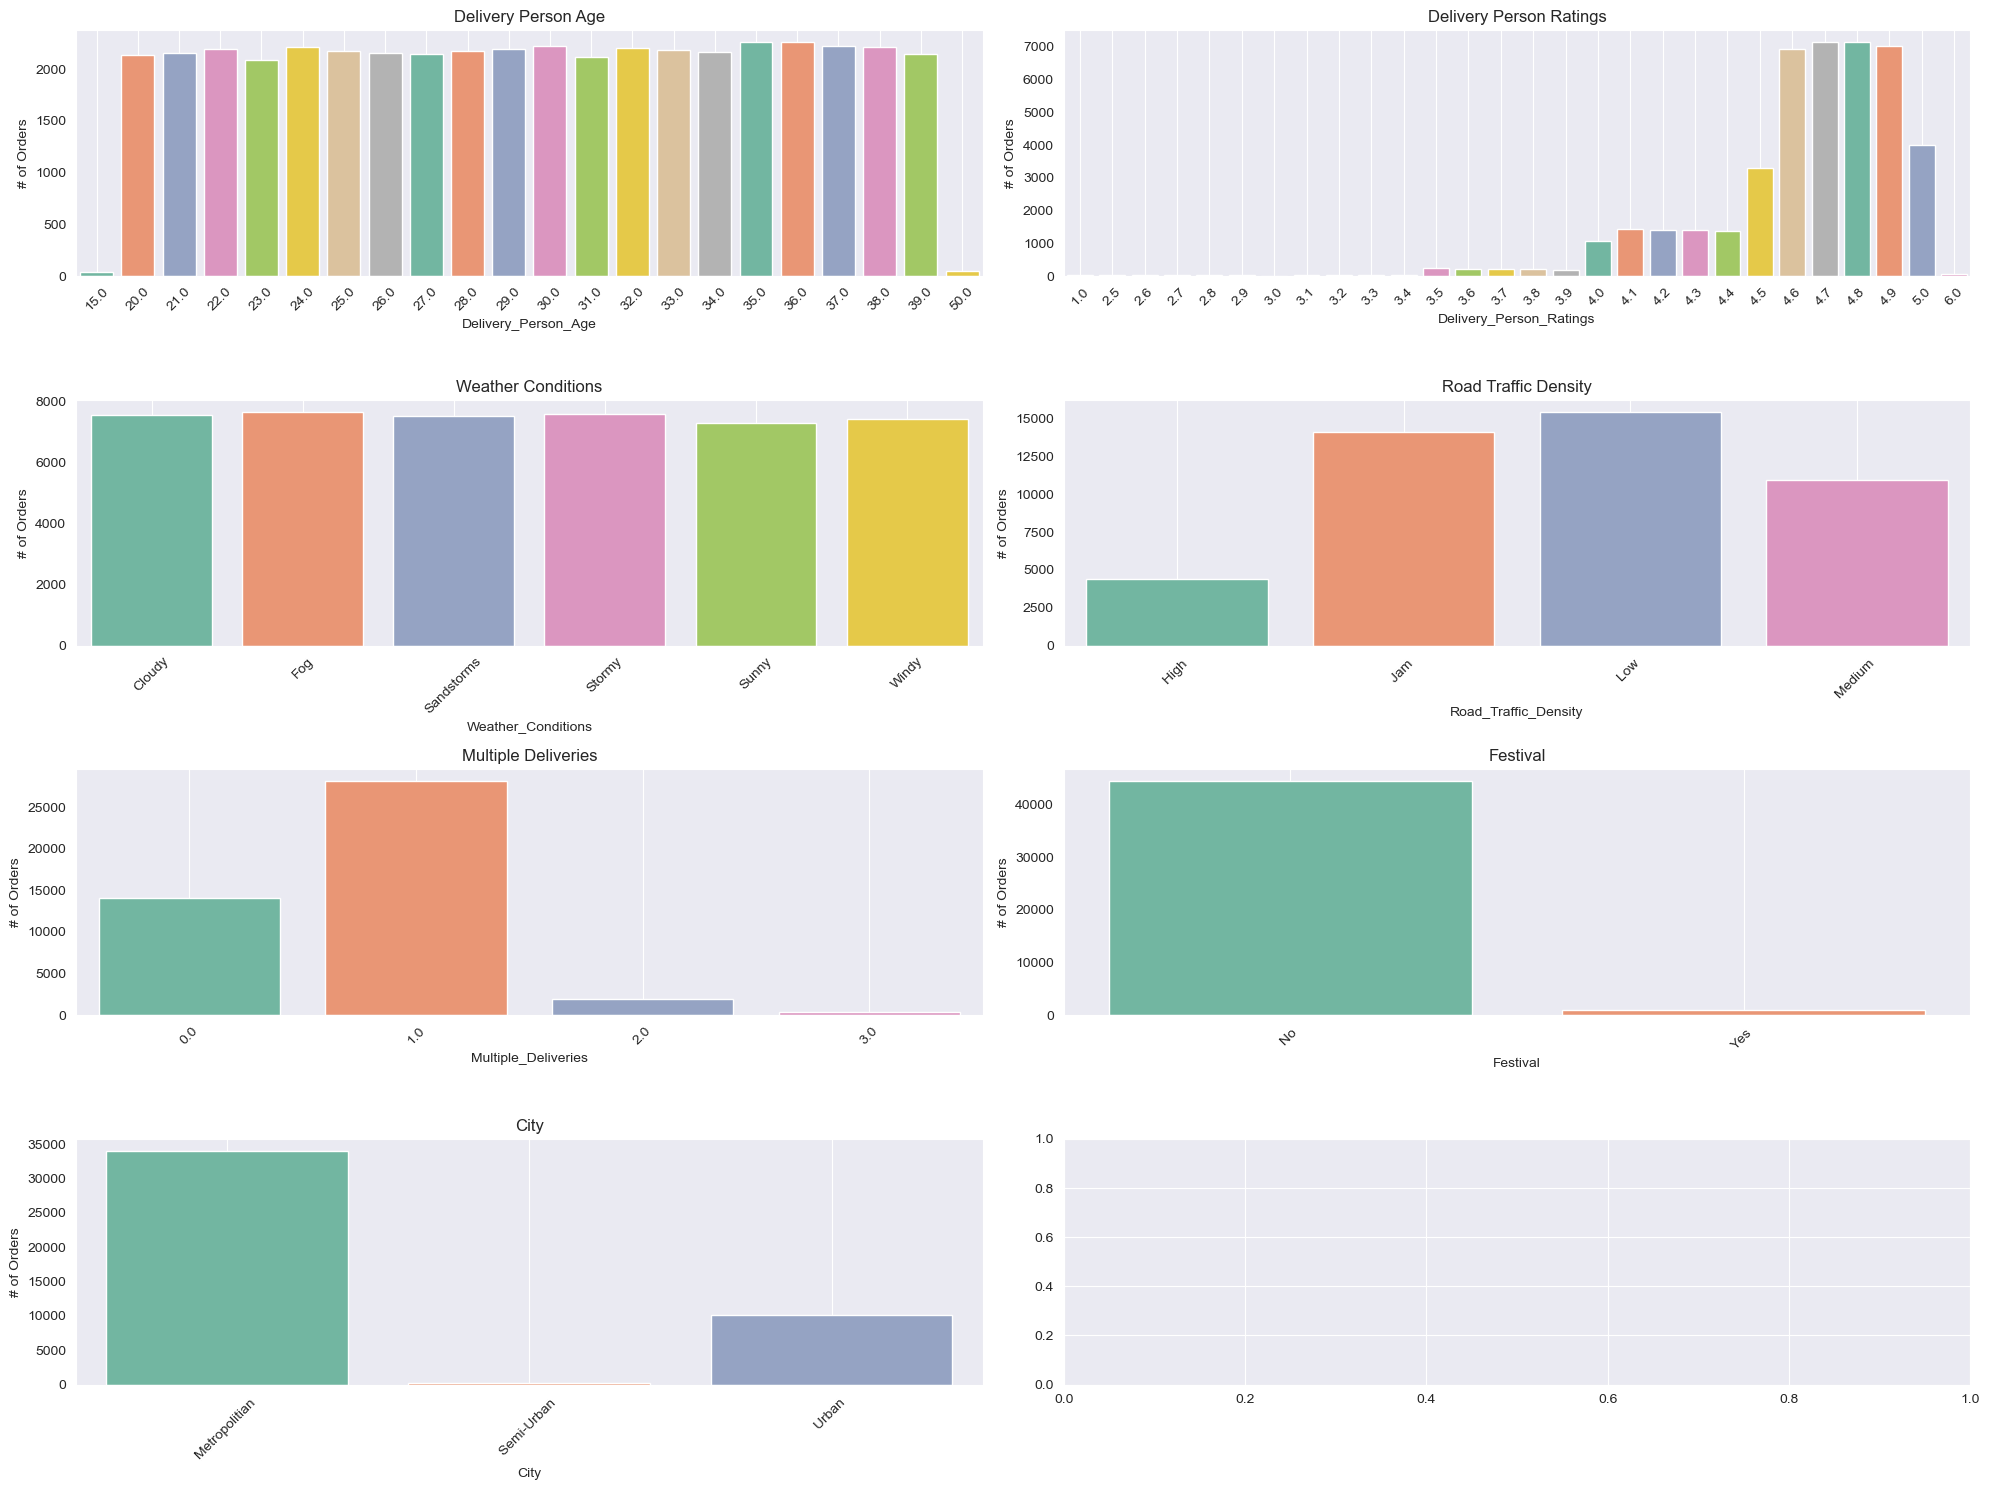

In [20]:
num_plots = len(cols)    
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 15))

for i, col_name in enumerate(cols, start=0):
    row = i // 2
    col = i % 2
    
    ax = axes[row, col]
    sns.set_style("white")
    sns.countplot(data=df_train, x=col_name, order=df_train[col_name].value_counts().sort_index().index, ax=ax, palette='Set2')
    
    ax.set_xlabel(col_name)
    ax.set_ylabel("# of Orders")
    ax.set_title(' '.join(col_name.split('_')))
    ax.tick_params(axis='x', rotation=45)
    ax.grid()
    
if num_plots % 2 == 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [21]:
# Handle null values
def handle_null_values(df):
    df["Delivery_Person_Age"].fillna(np.random.choice(df["Delivery_Person_Age"]), inplace=True)
    df["Weather_Conditions"].fillna(np.random.choice(df["Weather_Conditions"]), inplace=True)
    df["City"].fillna(df["City"].mode()[0], inplace=True)
    df["Festival"].fillna(df["Festival"].mode()[0], inplace=True)
    df["Multiple_Deliveries"].fillna(df["Multiple_Deliveries"].mode()[0], inplace=True)
    df["Road_Traffic_Density"].fillna(df["Road_Traffic_Density"].mode()[0], inplace=True)
    df["Delivery_Person_Ratings"].fillna(df["Delivery_Person_Ratings"].median(), inplace=True)

handle_null_values(df_train)

df_train.isnull().sum()

Delivery_Person_Age               0
Delivery_Person_Ratings           0
Restaurant_Latitude               0
Restaurant_Longitude              0
Delivery_Location_Latitude        0
Delivery_Location_Longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_Picked                 0
Weather_Conditions                0
Road_Traffic_Density              0
Vehicle_Condition                 0
Type_Of_Order                     0
Type_Of_Vehicle                   0
Multiple_Deliveries               0
Festival                          0
City                              0
Time_Taken(Min)                   0
City_Code                         0
dtype: int64

# Feature Engineering

In [22]:
def extract_date_features(data):
    data["day"] = data["Order_Date"].dt.day
    data["month"] = data["Order_Date"].dt.month
    data['quarter'] = data["Order_Date"].dt.quarter
    data["year"] = data["Order_Date"].dt.year
    data["day_of_week"] = data["Order_Date"].dt.day_of_week.astype(int)
    data["is_month_start"] = data["Order_Date"].dt.is_month_start.astype(int)
    data["is_month_end"] = data["Order_Date"].dt.is_month_end.astype(int)
    data["is_quarter_start"] = data["Order_Date"].dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data["Order_Date"].dt.is_quarter_end.astype(int)
    data["is_year_start"] = data["Order_Date"].dt.is_year_start.astype(int)
    data["is_year_end"] = data["Order_Date"].dt.is_year_end.astype(int)
    data["is_weekend"] = np.where(data["day_of_week"].isin([5,6]), 1, 0)
    
extract_date_features(df_train)
df_train.head()

,Delivery_Person_Age,Delivery_Person_Ratings,Restaurant_Latitude,Restaurant_Longitude,Delivery_Location_Latitude,Delivery_Location_Longitude,Order_Date,Time_Orderd,Time_Order_Picked,Weather_Conditions,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,1,2022,5,0,0,0,0,0,0,1
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,1,2022,4,0,0,0,0,0,0,0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,1,2022,5,0,0,0,0,0,0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,2,2022,1,0,0,0,0,0,0,0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,1,2022,5,0,0,0,0,0,0,1


In [23]:
#Calculate Time Differnce 
def calculate_time_diff(df):
    # Find the difference between ordered time & picked time
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])

    df['Time_Order_Picked'] = pd.to_timedelta(df['Time_Order_Picked'])

    df['Time_Order_Picked_Formatted'] = df['Order_Date'] + np.where(df['Time_Order_Picked'] < df['Time_Orderd'], pd.DateOffset(days=1), pd.DateOffset(days=0)) + df['Time_Order_Picked']
    df['Time_Ordered_Formatted'] = df['Order_Date'] + df['Time_Orderd']

    df['Time_Order_Picked_Formatted']=pd.to_datetime(df['Time_Order_Picked_Formatted'])

    df['Order_Prepare_Time'] = (df['Time_Order_Picked_Formatted'] - df['Time_Ordered_Formatted']).dt.total_seconds() / 60

    # Handle null values by filling with the median
    df['Order_Prepare_Time'].fillna(df['Order_Prepare_Time'].median(), inplace=True)

    # Drop all the time & date related columns
    df.drop(['Time_Orderd', 'Time_Order_Picked', 'Time_Ordered_Formatted', 'Time_Order_Picked_Formatted', 'Order_Date'], axis=1, inplace=True)


calculate_time_diff(df_train)
df_train.head(10)

,Delivery_Person_Age,Delivery_Person_Ratings,Restaurant_Latitude,Restaurant_Longitude,Delivery_Location_Latitude,Delivery_Location_Longitude,Weather_Conditions,Road_Traffic_Density,Vehicle_Condition,Type_Of_Order,...,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,Order_Prepare_Time
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,2022,5,0,0,0,0,0,0,1,15.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,2022,4,0,0,0,0,0,0,0,5.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,2022,5,0,0,0,0,0,0,1,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,2022,1,0,0,0,0,0,0,0,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,2022,5,0,0,0,0,0,0,1,15.0
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,Cloudy,Jam,0,Buffet,...,2022,4,0,0,0,0,0,0,0,10.0
6,33.0,4.7,23.369746,85.339820,23.479746,85.449820,Fog,Jam,1,Meal,...,2022,4,0,0,0,0,0,0,0,15.0
7,35.0,4.6,12.352058,76.606650,12.482058,76.736650,Cloudy,Medium,2,Meal,...,2022,0,0,0,0,0,0,0,0,5.0
8,22.0,4.8,17.433809,78.386744,17.563809,78.516744,Stormy,Jam,0,Buffet,...,2022,6,0,0,0,0,0,0,1,10.0
9,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,2022,5,0,0,0,0,0,0,1,15.0


In [24]:
def calculate_distance(df):
    df["Distance"] = np.zeros(len(df))
    restaurant_coordinates = df[["Restaurant_Latitude","Restaurant_Longitude"]].to_numpy()
    delivery_coordinates = df[["Delivery_Location_Latitude","Delivery_Location_Longitude"]].to_numpy()
    
    zipped_coords = zip(restaurant_coordinates, delivery_coordinates)
    df["Distance"] = np.array([geodesic(res, deli) for res, deli in zipped_coords])
    
    print(df["Distance"].head())
    
    df["Distance"] = df["Distance"].astype('str').str.extract('(\d+)').astype(int)
    
calculate_distance(df_train)

0    3.0207366434610647 km
1    20.143736910348597 km
2     1.549692932239404 km
3     7.774496620087613 km
4     6.197897916874956 km
Name: Distance, dtype: object


In [25]:
df_train.head(10)

,Delivery_Person_Age,Delivery_Person_Ratings,Restaurant_Latitude,Restaurant_Longitude,Delivery_Location_Latitude,Delivery_Location_Longitude,Weather_Conditions,Road_Traffic_Density,Vehicle_Condition,Type_Of_Order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,Order_Prepare_Time,Distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,5,0,0,0,0,0,0,1,15.0,6
5,22.0,4.8,17.431668,78.408321,17.461668,78.438321,Cloudy,Jam,0,Buffet,...,4,0,0,0,0,0,0,0,10.0,4
6,33.0,4.7,23.369746,85.339820,23.479746,85.449820,Fog,Jam,1,Meal,...,4,0,0,0,0,0,0,0,15.0,16
7,35.0,4.6,12.352058,76.606650,12.482058,76.736650,Cloudy,Medium,2,Meal,...,0,0,0,0,0,0,0,0,5.0,20
8,22.0,4.8,17.433809,78.386744,17.563809,78.516744,Stormy,Jam,0,Buffet,...,6,0,0,0,0,0,0,1,10.0,19
9,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,Snack,...,5,0,0,0,0,0,0,1,15.0,10


# Data Preprocessing

## Label Encoding

In [26]:
def label_encoding(df):
    cat_cols = df.select_dtypes(include=["object"]).columns
    print(cat_cols)
    
    label_encoder = LabelEncoder()
    df[cat_cols] = df[cat_cols].apply(lambda col: label_encoder.fit_transform(col))
    
label_encoding(df_train)
df_train.head()

Index(['Weather_Conditions', 'Road_Traffic_Density', 'Type_Of_Order',
       'Type_Of_Vehicle', 'Festival', 'City', 'City_Code'],
      dtype='object')


,Delivery_Person_Age,Delivery_Person_Ratings,Restaurant_Latitude,Restaurant_Longitude,Delivery_Location_Latitude,Delivery_Location_Longitude,Weather_Conditions,Road_Traffic_Density,Vehicle_Condition,Type_Of_Order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,Order_Prepare_Time,Distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,4,0,2,3,...,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,3,...,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,1,...,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,4,3,0,0,...,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,0,0,1,3,...,5,0,0,0,0,0,0,1,15.0,6


## Train Test Data Split

In [27]:
# Split the dataset into train and test data
X = df_train.drop("Time_Taken(Min)", axis=1)  # Features
y = df_train["Time_Taken(Min)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Data Shape: {}\nTesting Features Data Shape: {}\nTraining Target Data Shape: {}\nTesting Target Data Shape: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Training Features Data Shape: (36474, 29)
Testing Features Data Shape: (9119, 29)
Training Target Data Shape: (36474,)
Testing Target Data Shape: (9119,)


In [28]:
X_train.columns

Index(['Delivery_Person_Age', 'Delivery_Person_Ratings', 'Restaurant_Latitude',
       'Restaurant_Longitude', 'Delivery_Location_Latitude',
       'Delivery_Location_Longitude', 'Weather_Conditions',
       'Road_Traffic_Density', 'Vehicle_Condition', 'Type_Of_Order',
       'Type_Of_Vehicle', 'Multiple_Deliveries', 'Festival', 'City',
       'City_Code', 'day', 'month', 'quarter', 'year', 'day_of_week',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end',
       'is_year_start', 'is_year_end', 'is_weekend', 'Order_Prepare_Time',
       'Distance'],
      dtype='object')

## Standardization

In [29]:
# Create a Standard Scaler Object
scaler = StandardScaler()

# Fit the scaler on train data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)

# Model Building

### Steps
1. Employ cross-validation & hyper parameter tuning to determine the optimal regression model.
2. Construct the food delivery prediction model using the identified best model.
3. Evaluate the model's performance on the testing data to assess its accuracy and reliability.

In [30]:
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor()
]

parameter_grid = [
    {},
    {'max_depth':[1,2,3,4,5,6,7,8,9]},
    {'n_estimators':[100,200,300,400,500]},
    {'n_estimators':[20,25,30,35,40], 'max_depth':[5,6,7,8,9]}
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, parameter_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

LinearRegression:
Best parameters: {}
Best R2 score: 0.42439221556310464

DecisionTreeRegressor:
Best parameters: {'max_depth': 9}
Best R2 score: 0.7991818823819108

RandomForestRegressor:
Best parameters: {'n_estimators': 400}
Best R2 score: 0.8130233397600743

XGBRegressor:
Best parameters: {'max_depth': 7, 'n_estimators': 20}
Best R2 score: 0.8214109361981181



In [31]:
# Since XGBoost has highest R2 Score, fit the test data with it
model = xgb.XGBRegressor(n_estimators=20, max_depth=8)

# Fit the model using training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 3.15
Mean Squared Error (MSE): 15.74
Root Mean Squared Error (RMSE): 3.97
R-squared (R2) Score: 0.82


# Conclusion

**In conclusion, the food delivery prediction model was developed using XGBoost, achieving an impressive R2 score of 0.82. Moving forward, potential enhancements include identifying the best features, conducting additional feature engineering, and exploring other optimization techniques to further improve the model's performance and accuracy. These steps will contribute to fine-tuning the model and unlocking its full potential in predicting food delivery timings accurately.**



In [37]:
import pickle

filename = 'xgb_model.pkl'

with open(filename,'wb') as file:
    pickle.dump(model, file)
    
print(f"Model saved as : {filename}")

Model saved as : xgb_model.pkl


In [38]:
filename_scaler = 'std_scaler.pkl'

with open(filename_scaler,'wb') as file:
    pickle.dump(scaler, file)
    
print(f"Standard Scaler Saved as : {filename_scaler}")

Standard Scaler Saved as : std_scaler.pkl


In [39]:
!pip install streamlit

  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seleniumbase 4.30.8 requires packaging>=24.1; python_version >= "3.8", but you have packaging 23.2 which is incompatible.
